In [4]:
import random
import tensorflow as tf
from tensorflow import keras
import scipy.io as sio
import numpy as np
import pandas as pd
import sklearn
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import preprocessing
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from casadi import *
from casadi.tools import *
from pendulum_class import *
from controller import template_mpc
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [2]:
# we initialize 9 models so we can compare their behavior and take the best one

model1 = keras.Sequential(
    [
        
        keras.layers.Dense(30,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(30, activation='tanh', name='hidden_2'),

        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model2 = keras.Sequential(
    [
        
        keras.layers.Dense(30,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(30, activation='tanh', name='hidden_2'),
        keras.layers.Dense(30, activation='tanh', name='hidden_3'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model3 = keras.Sequential(
    [
        
        keras.layers.Dense(30,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(30, activation='tanh', name='hidden_2'),
        keras.layers.Dense(30, activation='tanh', name='hidden_3'),
        keras.layers.Dense(30, activation='tanh', name='hidden_4'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model4 = keras.Sequential(
    [
        
        keras.layers.Dense(60,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(60, activation='tanh', name='hidden_2'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model5 = keras.Sequential(
    [
        
        keras.layers.Dense(60,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(60, activation='tanh', name='hidden_2'),
        keras.layers.Dense(60, activation='tanh', name='hidden_3'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model6 = keras.Sequential(
    [
        
        keras.layers.Dense(60,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(60, activation='tanh', name='hidden_2'),
        keras.layers.Dense(60, activation='tanh', name='hidden_3'),
        keras.layers.Dense(60, activation='tanh', name='hidden_4'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model7 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model8 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(90, activation='tanh', name='hidden_3'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model9 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(90, activation='tanh', name='hidden_3'),
        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)

In [2]:
# Here we make the callback functions
# The first one is a scheduler to change the learning rate while training
# The second one is a chechpoint callback that saves the best parameters 
# The third one is Early stopping when there is no more progress in training

def scheduler(epoch, lr):
    if epoch < 300:
        return 0.001
    elif epoch < 400:
        return 0.0001
    elif epoch < 500:
        return 0.00005
    elif epoch < 600:
        return 0.000025
    elif epoch < 700:
        return 0.00001
    else:
        return 0.00001

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [4]:
# we compile the models with Adam algorithm and MSE as the loss function
model1.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model3.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model4.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model5.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model6.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model7.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model8.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model9.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)

In [136]:
# we load the data file "allZero" which contains the part of the simulation that is close to the upright position
training=sio.loadmat("allZero")
x_train=np.array(training['X'])
y_train=training['F'].reshape(1,-1).T




history1 = model1.fit(x_train,y_train,epochs=500,callbacks=[callback])
history2 = model2.fit(x_train,y_train,epochs=500,callbacks=[callback])
history3 = model3.fit(x_train,y_train,epochs=500,callbacks=[callback])
history4 = model4.fit(x_train,y_train,epochs=500,callbacks=[callback])
history5 = model5.fit(x_train,y_train,epochs=500,callbacks=[callback])
history6 = model6.fit(x_train,y_train,epochs=500,callbacks=[callback])
history7 = model7.fit(x_train,y_train,epochs=500,callbacks=[callback])
history8 = model8.fit(x_train,y_train,epochs=500,callbacks=[callback])
history9 = model9.fit(x_train,y_train,epochs=500,callbacks=[callback])


Epoch 1/500
1693/1693 [==============================] - 2s 1ms/step - loss: 4.6683e-04
Epoch 2/500
 902/1693 [==============>...............] - ETA: 0s - loss: 5.7327e-04

KeyboardInterrupt: 

2
[[-0.08888958]
 [-2.39251317]
 [ 2.82058904]
 [ 1.81045026]
 [ 5.22028743]
 [ 2.31483942]]
2
[[-0.01561322]
 [-2.20650848]
 [ 2.96291674]
 [ 1.85644278]
 [ 4.04849464]
 [ 4.70190748]]
2
[[ 0.05881278]
 [-2.07289711]
 [-3.09575795]
 [ 1.86792067]
 [ 2.58769708]
 [ 6.45941352]]
2
[[ 0.13256291]
 [-2.0038047 ]
 [-2.80961346]
 [ 1.81833453]
 [ 0.82337427]
 [ 7.85346133]]
2
[[ 0.20223959]
 [-2.01102493]
 [-2.46755602]
 [ 1.65191295]
 [-1.22494289]
 [ 9.32624682]]
2
[[ 0.26139021]
 [-2.10144529]
 [-2.06562455]
 [ 1.27953085]
 [-3.15537549]
 [10.56536462]]
2
[[ 0.30294106]
 [-2.24267599]
 [-1.65617819]
 [ 0.81680626]
 [-3.6536582 ]
 [ 9.5401952 ]]
2
[[ 0.3282565 ]
 [-2.38714947]
 [-1.30991267]
 [ 0.46403227]
 [-3.58992196]
 [ 7.82099293]]
2
[[ 0.3407282 ]
 [-2.53382094]
 [-1.02615485]
 [ 0.16317625]
 [-3.80398813]
 [ 6.39523397]]
2
[[ 0.34137973]
 [-2.69681871]
 [-0.79933046]
 [-0.13186934]
 [-4.4222256 ]
 [ 4.88639517]]
2
[[ 0.32996474]
 [-2.89485216]
 [-0.64450934]
 [-0.44208797]
 [-5.584

1
[[ 0.64119836]
 [-0.83709519]
 [-0.45072882]
 [-0.34120726]
 [ 6.05888853]
 [-4.27776347]]
1
[[ 0.62324354]
 [-0.59411381]
 [-0.63365775]
 [-0.55384608]
 [ 6.04287305]
 [-4.69267513]]
1
[[ 0.59670207]
 [-0.35699505]
 [-0.81200595]
 [-0.76222698]
 [ 5.7755735 ]
 [-4.10771357]]
1
[[ 0.56291264]
 [-0.13125081]
 [-0.95991651]
 [-0.92282212]
 [ 5.55202941]
 [-3.30397817]]
1
[[ 0.52374931]
 [ 0.08936569]
 [-1.07732665]
 [-1.03415961]
 [ 5.52822824]
 [-2.57405185]]
1
[[ 0.48119058]
 [ 0.31281759]
 [-1.16528114]
 [-1.09249145]
 [ 5.69243427]
 [-1.79879762]]
1
[[ 0.43709899]
 [ 0.54742943]
 [-1.21813519]
 [-1.10860314]
 [ 6.08818093]
 [-0.77874169]]
1
[[ 0.39361219]
 [ 0.80265804]
 [-1.2220073 ]
 [-1.05781305]
 [ 6.72678368]
 [ 0.68462047]]
1
[[ 0.3534659 ]
 [ 1.08965054]
 [-1.15442496]
 [-0.93439828]
 [ 7.67346219]
 [ 2.81666937]]
1
[[ 0.32071733]
 [ 1.41962842]
 [-0.98822892]
 [-0.68251375]
 [ 8.86899446]
 [ 5.60739165]]
1
[[ 0.30079646]
 [ 1.80206579]
 [-0.69741846]
 [-0.29359166]
 [10.286

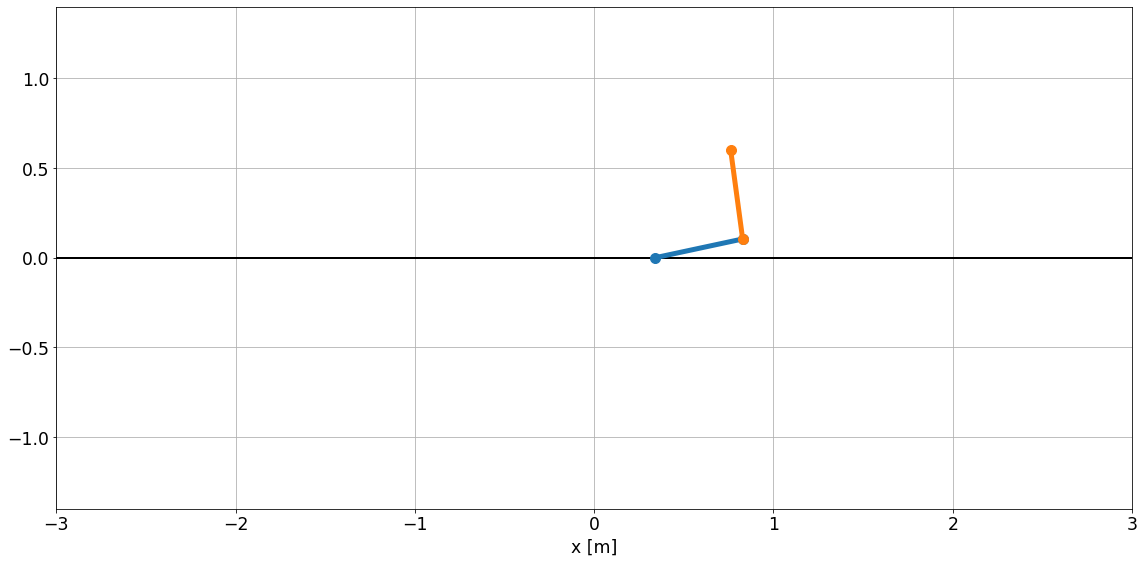

In [230]:
# We simulate here the behavior of the neural network


x0 = np.array(x_train[40,:]).reshape(-1,1) # initial state of the pendulum
pendulum = pendulum_simulator(x0)

u=[]
xx=[x0]
flag=False
for _ in range(150):
    
    if max(abs(x0[2]))<0.17:
        flag=True
        
    if flag:
        u0=model8(x0.T)
        print(1)
        print(x0)
    else:
        u0 = model999(x0.T)
        print(2)
        print(x0)
    
    
    x0 = pendulum.simulate(u0)
    u.append(u0)
    x = [x0[1],x0[2]]
    xwrap=np.remainder(x, 2*np.pi)
    mask = np.abs(xwrap)>np.pi
    xwrap[mask] -= 2*np.pi * np.sign(xwrap[mask])
    x0[1]=xwrap[0]
    x0[2]=xwrap[1]
    xx.append(x0)

# Generate a gif containing the results
pendulum.export_gif()

In [203]:
#Here we compare between the output of the NN and the MPC
qw=[]

for i in range(0,110):
    qw.append(u[i].numpy())
qw=np.array(qw)
zz=y_train[40:150,:]-qw[:,:,0]
zz[40]

In [9]:
#This function plot the error  
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': (y[:,0]-pred[:,0])})
   # if sort
    #    t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    #plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()



0.9999999720650928


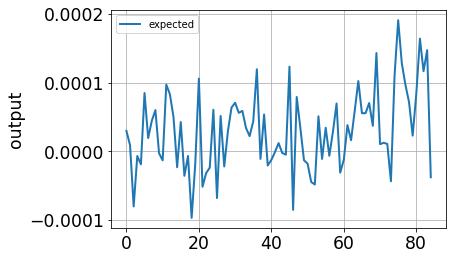

In [226]:
#here we calculate the R2 score
y_hat_scaled = model999(x_train)
y_hat = (y_hat_scaled)

print(sklearn.metrics.r2_score(y_hat, (y_train[:,:])))
chart_regression(y_hat[:85,:],y_train[:85,:])

In [ ]:
# This part is for hyperparameter tuning


training=sio.loadmat("allNotZero")
x_train=np.array(training['X'])
y_train=training['F'].reshape(1,-1).T


def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(6,), name='input'))
    
    for i in range(hp.Int('layers', 3, 9)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), 30, 180, step=30),
            activation='tanh' ))
        #model.add(layers.Dropout(hp.Choice('dropout_'+ str(i), values=[0.0,0.1,0.2])))
    

    model.add(keras.layers.Dense(1,activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.mse,
                metrics=['mean_squared_error'])

    return model

tuner = kt.Hyperband(model_builder,
                     objective='loss',
                     max_epochs=50,
                     factor=3,
                     directory='bsss',
                     project_name='Pendulum')


#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(x_train[:5000,:], y_train[:5000,:], epochs=1000)


Trial 83 Complete [00h 00m 38s]
loss: 0.8347954154014587

Best loss So Far: 0.6989577412605286
Total elapsed time: 00h 12m 39s

Search: Running Trial #84

Hyperparameter    |Value             |Best Value So Far 
layers            |7                 |4                 
units_0           |60                |120               
units_1           |120               |150               
units_2           |120               |180               
learning_rate     |0.001             |0.001             
units_3           |150               |150               
units_4           |120               |30                
units_5           |180               |120               
units_6           |150               |180               
units_7           |180               |120               
units_8           |30                |180               
tuner/epochs      |50                |50                
tuner/initial_e...|17                |17                
tuner/bracket     |1                 |3        

In [140]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1050      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 180)               27180     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 181       
Total params: 51,061
Trainable params: 51,061
Non-trainable params: 0
_________________________________________________________________


In [141]:

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
    # Loss function to minimize
    loss=tf.keras.losses.MSE)


history1 = model.fit(x_train, y_train, epochs=1000,callbacks=[callback], validation_split=0.1)



Epoch 1/1000
1806/1806 [==============================] - 4s 2ms/step - loss: 3.8646 - val_loss: 3.6811
Epoch 2/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 2.8443 - val_loss: 3.1716
Epoch 3/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 2.3950 - val_loss: 3.0345
Epoch 4/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 2.1290 - val_loss: 3.0885
Epoch 5/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 1.9214 - val_loss: 2.8763
Epoch 6/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 1.7619 - val_loss: 2.7767
Epoch 7/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 1.6168 - val_loss: 2.7616
Epoch 8/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 1.5231 - val_loss: 2.6973
Epoch 9/1000
1806/1806 [==============================] - 3s 2ms/step - loss: 1.4298 - val_loss: 2.8039
Epoch 10/1000
1806/1806 [==============================] - 3s 2m

KeyboardInterrupt: 

In [244]:
val_acc_per_epoch = history1.history['val_loss']
acc_per_epoch = history1.history['loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 21


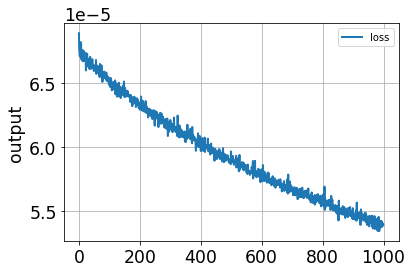

In [246]:

t = pd.DataFrame({'loss':acc_per_epoch,'val_loss':val_acc_per_epoch })
# if sort:
#    t.sort_values(by=['y'], inplace=True)
#plt.plot(t['val_loss'].tolist(), label='val_loss')
plt.plot(t['loss'].tolist(), label='loss')
plt.ylabel('output')
plt.legend()
plt.show()


In [15]:
model11 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
     
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(90, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(30, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model22 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(90, activation='tanh', name='hidden_3'),
        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model33 = keras.Sequential(
    [
        
        keras.layers.Dense(90,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(90, activation='tanh', name='hidden_2'),
        keras.layers.Dense(90, activation='tanh', name='hidden_3'),
        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
        keras.layers.Dense(90, activation='tanh', name='hidden_5'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model44 = keras.Sequential(
    [
        
        keras.layers.Dense(120,input_dim=6, activation='tanh', name='hidden_1'),
     
        keras.layers.Dense(120, activation='tanh', name='hidden_2'),
        keras.layers.Dense(120, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(30, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model55 = keras.Sequential(
    [
        
        keras.layers.Dense(120,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(120, activation='tanh', name='hidden_2'),
        keras.layers.Dense(120, activation='tanh', name='hidden_3'),
        keras.layers.Dense(120, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model66 = keras.Sequential(
    [
        
        keras.layers.Dense(150,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(120, activation='tanh', name='hidden_2'),
        keras.layers.Dense(120, activation='tanh', name='hidden_3'),
        keras.layers.Dense(120, activation='tanh', name='hidden_4'),
        keras.layers.Dense(120, activation='tanh', name='hidden_5'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model77 = keras.Sequential(
    [
        
        keras.layers.Dense(150,input_dim=6, activation='tanh', name='hidden_1'),
     
        keras.layers.Dense(150, activation='tanh', name='hidden_2'),
        keras.layers.Dense(150, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(30, activation='tanh', name='hidden_3'),
#        keras.layers.Dense(90, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model88 = keras.Sequential(
    [
        
        keras.layers.Dense(150,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(150, activation='tanh', name='hidden_2'),
        keras.layers.Dense(150, activation='tanh', name='hidden_3'),
        keras.layers.Dense(150, activation='tanh', name='hidden_4'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)
model99 = keras.Sequential(
    [
        
        keras.layers.Dense(150,input_dim=6, activation='tanh', name='hidden_1'),
         
        keras.layers.Dense(150, activation='tanh', name='hidden_2'),
        keras.layers.Dense(150, activation='tanh', name='hidden_3'),
        keras.layers.Dense(150, activation='tanh', name='hidden_4'),
        keras.layers.Dense(150, activation='tanh', name='hidden_5'),
#        keras.layers.Dense(60, activation='tanh', name='hidden_44',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_5',kernel_regularizer=regularizers.l2(0.001)),
#        keras.layers.Dense(60, activation='tanh', name='hidden_6',kernel_regularizer=regularizers.l2(0.001)),
#       keras.layers.Dense(50, activation='tanh', name='hidden_7'),
#       keras.layers.Dense(50, activation='tanh', name='hidden_8'),
        keras.layers.Dense(1, activation='linear', name='output'),
        
    ],
    name='simple_model'
)


In [16]:

model11.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model22.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model33.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model44.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model55.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model66.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model77.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model88.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)
model99.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.MSE)

In [49]:

training=sio.loadmat("allNotZero")
x_train=np.array(training['X'])
y_train=training['F'].reshape(1,-1).T
x_train=x_train[:5000,:]
y_train=y_train[:5000,:]


history11 = model11.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history22 = model22.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history33 = model33.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history44 = model44.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history55 = model55.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history66 = model66.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history77 = model77.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history88 = model88.fit(x_train,y_train,epochs=1000,callbacks=[callback])
history99 = model99.fit(x_train,y_train,epochs=1000,callbacks=[callback])


Epoch 1/1000
157/157 [==============================] - 1s 2ms/step - loss: 0.4029
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.5569
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.3581
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2137
Epoch 5/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 6/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1252
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1199
Epoch 8/1000
157/157 [==============================] - 0s 3ms/step - loss: 0.1006
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0868
E

157/157 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 195/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 196/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 197/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 198/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 199/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1408
Epoch 200/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1143
Epoch 201/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 202/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 203/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 204/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 205/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 387/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 388/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 389/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 390/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 391/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 392/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 393/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 394/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 395/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 396/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 397/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 579/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 580/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 581/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 582/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 583/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 584/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 585/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 586/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 587/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 588/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 589/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 675/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 676/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 677/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 678/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 679/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 680/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 681/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 682/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 683/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 684/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 685/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 867/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 868/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 869/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 870/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 871/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 872/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 873/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 874/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 875/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 876/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 877/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 60/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 61/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 62/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 63/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 64/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 65/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 66/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 67/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 68/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 69/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0347
Epoch 70/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 

157/157 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 157/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 158/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 159/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 160/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 161/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 162/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 163/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 164/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 165/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 166/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 167/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 349/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 350/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 351/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 352/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 353/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 354/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 355/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 356/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 357/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 358/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 359/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 2.0807e-04
Epoch 534/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1164e-04
Epoch 535/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0356e-04
Epoch 536/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0250e-04
Epoch 537/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0325e-04
Epoch 538/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1136e-04
Epoch 539/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0407e-04
Epoch 540/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0328e-04
Epoch 541/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0022e-04
Epoch 542/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0121e-04
Epoch 543/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.9882e-04
Epoch 544/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 1.2462e-04
Epoch 718/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2313e-04
Epoch 719/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2636e-04
Epoch 720/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2353e-04
Epoch 721/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2362e-04
Epoch 722/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2355e-04
Epoch 723/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2127e-04
Epoch 724/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2322e-04
Epoch 725/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2280e-04
Epoch 726/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2339e-04
Epoch 727/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2289e-04
Epoch 728/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 9.6180e-05
Epoch 902/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.6029e-05
Epoch 903/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.5445e-05
Epoch 904/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.6377e-05
Epoch 905/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.5471e-05
Epoch 906/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.7240e-05
Epoch 907/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.6233e-05
Epoch 908/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.4772e-05
Epoch 909/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.4041e-05
Epoch 910/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.6411e-05
Epoch 911/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.4618e-05
Epoch 912/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 89/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 90/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 91/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 92/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 93/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 94/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1712
Epoch 95/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1625
Epoch 96/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1551
Epoch 97/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 98/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 99/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 

157/157 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 281/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 282/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 283/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 284/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 285/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 286/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 287/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 288/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 289/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 290/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 291/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 3.7682e-04
Epoch 469/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.0756e-04
Epoch 470/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.7501e-04
Epoch 471/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.7060e-04
Epoch 472/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.4786e-04
Epoch 473/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2417e-04
Epoch 474/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.3008e-04
Epoch 475/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2124e-04
Epoch 476/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.5114e-04
Epoch 477/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.4231e-04
Epoch 478/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.5587e-04
Epoch 479/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 1.1160e-04
Epoch 653/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1249e-04
Epoch 654/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1085e-04
Epoch 655/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1164e-04
Epoch 656/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.0966e-04
Epoch 657/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1188e-04
Epoch 658/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1102e-04
Epoch 659/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.0933e-04
Epoch 660/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1007e-04
Epoch 661/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.0930e-04
Epoch 662/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.0906e-04
Epoch 663/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 7.1815e-05
Epoch 836/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1886e-05
Epoch 837/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1502e-05
Epoch 838/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2714e-05
Epoch 839/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2024e-05
Epoch 840/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2616e-05
Epoch 841/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1878e-05
Epoch 842/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1638e-05
Epoch 843/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1264e-05
Epoch 844/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2485e-05
Epoch 845/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2084e-05
Epoch 846/1000
157/157 [============

157/157 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 21/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 22/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 23/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0792
Epoch 24/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0605
Epoch 25/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 26/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 27/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 28/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 29/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 30/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 31/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 

157/157 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 214/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 215/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 216/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 217/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 218/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 219/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 220/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 221/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 222/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 223/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 224/1000
157/157 [==============================] - 0s 1ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 4.5219e-04
Epoch 404/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5112e-04
Epoch 405/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.4380e-04
Epoch 406/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.3270e-04
Epoch 407/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5266e-04
Epoch 408/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.4945e-04
Epoch 409/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.4383e-04
Epoch 410/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.4906e-04
Epoch 411/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.4589e-04
Epoch 412/1000
157/157 [==============================] - 0s 1ms/step - loss: 4.4954e-04
Epoch 413/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5682e-04
Epoch 414/1000
157/157 [============

Epoch 587/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.6270e-04
Epoch 588/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5392e-04
Epoch 589/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.6163e-04
Epoch 590/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.6149e-04
Epoch 591/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5440e-04
Epoch 592/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.6922e-04
Epoch 593/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5956e-04
Epoch 594/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.6135e-04
Epoch 595/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5520e-04
Epoch 596/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5861e-04
Epoch 597/1000
157/157 [==============================] - 0s 1ms/step - loss: 1.5764e-04
Epoch 598/1000
157/15

Epoch 770/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.3772e-05
Epoch 771/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.2793e-05
Epoch 772/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.2708e-05
Epoch 773/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.3485e-05
Epoch 774/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.3280e-05
Epoch 775/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.3514e-05
Epoch 776/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.3166e-05
Epoch 777/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.2517e-05
Epoch 778/1000
157/157 [==============================] - 0s 1ms/step - loss: 9.2223e-05
Epoch 779/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.1652e-05
Epoch 780/1000
157/157 [==============================] - 0s 2ms/step - loss: 9.1101e-05
Epoch 781/1000
157/15

157/157 [==============================] - 0s 2ms/step - loss: 7.0326e-05
Epoch 954/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2310e-05
Epoch 955/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9469e-05
Epoch 956/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0365e-05
Epoch 957/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.7500e-05
Epoch 958/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8970e-05
Epoch 959/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9801e-05
Epoch 960/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9099e-05
Epoch 961/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0260e-05
Epoch 962/1000
157/157 [==============================] - 0s 1ms/step - loss: 6.9999e-05
Epoch 963/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9731e-05
Epoch 964/1000
157/157 [============

Epoch 48/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 49/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 50/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 51/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 52/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 53/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 54/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 55/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 56/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 57/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 58/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 59/1000
157/157 [==============================] - 0s 2ms/step - loss:

Epoch 145/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 146/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 147/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 148/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 149/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 150/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 151/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 152/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 153/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0594
Epoch 154/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0860
Epoch 155/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 156/1000
157/157 [==============================] - 0s 2ms/

157/157 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 242/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 243/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 244/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 245/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 246/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 247/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1112
Epoch 248/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 249/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1178
Epoch 250/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 251/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 252/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 2.0122e-04
Epoch 430/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0249e-04
Epoch 431/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0127e-04
Epoch 432/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1935e-04
Epoch 433/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3092e-04
Epoch 434/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2739e-04
Epoch 435/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.0682e-04
Epoch 436/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8520e-04
Epoch 437/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8453e-04
Epoch 438/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7580e-04
Epoch 439/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8101e-04
Epoch 440/1000
157/157 [============

Epoch 521/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.0661e-05
Epoch 522/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1539e-05
Epoch 523/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.4090e-05
Epoch 524/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.4007e-05
Epoch 525/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.6139e-05
Epoch 526/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.5220e-05
Epoch 527/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2015e-05
Epoch 528/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.1098e-05
Epoch 529/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2734e-05
Epoch 530/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.5979e-05
Epoch 531/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.9038e-05
Epoch 532/1000
157/15

157/157 [==============================] - 0s 2ms/step - loss: 3.6075e-05
Epoch 614/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6181e-05
Epoch 615/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6681e-05
Epoch 616/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6615e-05
Epoch 617/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6106e-05
Epoch 618/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6018e-05
Epoch 619/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6066e-05
Epoch 620/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6060e-05
Epoch 621/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6917e-05
Epoch 622/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6519e-05
Epoch 623/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6221e-05
Epoch 624/1000
157/157 [============

Epoch 797/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3981e-05
Epoch 798/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3450e-05
Epoch 799/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4362e-05
Epoch 800/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4025e-05
Epoch 801/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4448e-05
Epoch 802/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3524e-05
Epoch 803/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4286e-05
Epoch 804/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4044e-05
Epoch 805/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3858e-05
Epoch 806/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3759e-05
Epoch 807/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3460e-05
Epoch 808/1000
157/15

157/157 [==============================] - 0s 2ms/step - loss: 1.7020e-05
Epoch 981/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7502e-05
Epoch 982/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.6433e-05
Epoch 983/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7235e-05
Epoch 984/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7423e-05
Epoch 985/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7296e-05
Epoch 986/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7481e-05
Epoch 987/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7533e-05A: 0s - loss: 1.8356e
Epoch 988/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7103e-05
Epoch 989/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7395e-05
Epoch 990/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7651e-05
Epoch 991/1000


157/157 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 77/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0679
Epoch 78/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 79/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 80/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 81/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 82/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 83/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 84/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 85/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0603
Epoch 86/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 87/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1246
Epoch 

157/157 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 269/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 270/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 271/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 272/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 273/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 274/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 275/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 276/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 277/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 278/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 279/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 5.4415e-04
Epoch 458/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4977e-04
Epoch 459/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.3421e-04
Epoch 460/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.3679e-04
Epoch 461/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4872e-04
Epoch 462/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.5759e-04
Epoch 463/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4848e-04
Epoch 464/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.3346e-04
Epoch 465/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.2316e-04
Epoch 466/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.0794e-04
Epoch 467/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.9268e-04
Epoch 468/1000
157/157 [============

Epoch 549/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.9022e-04
Epoch 550/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8981e-04
Epoch 551/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8860e-04
Epoch 552/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8828e-04
Epoch 553/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.9331e-04
Epoch 554/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8682e-04
Epoch 555/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.8161e-04
Epoch 556/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7437e-04
Epoch 557/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7509e-04
Epoch 558/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7693e-04
Epoch 559/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7491e-04
Epoch 560/1000
157/15

157/157 [==============================] - 0s 2ms/step - loss: 7.4986e-05
Epoch 642/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.4451e-05
Epoch 643/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.4607e-05
Epoch 644/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.4194e-05
Epoch 645/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3283e-05
Epoch 646/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3401e-05
Epoch 647/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3419e-05
Epoch 648/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3172e-05
Epoch 649/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3701e-05
Epoch 650/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.3648e-05
Epoch 651/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.2908e-05
Epoch 652/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 3.0299e-05A: 0s - loss: 2.6866e-
Epoch 825/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9580e-05
Epoch 826/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9933e-05
Epoch 827/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9583e-05
Epoch 828/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.0334e-05
Epoch 829/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.0621e-05
Epoch 830/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.0936e-05
Epoch 831/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.0861e-05
Epoch 832/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.0532e-05
Epoch 833/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9504e-05
Epoch 834/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9315e-05
Epoch 835/1000

157/157 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 7/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 8/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 9/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 10/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 11/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 12/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 13/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 14/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 15/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 16/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 17/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 18/

157/157 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 200/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 201/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 202/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 203/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 204/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 205/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 206/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 207/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 208/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 209/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 210/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 3.8592e-04
Epoch 389/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.1761e-04
Epoch 390/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.9293e-04
Epoch 391/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.7117e-04
Epoch 392/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.1099e-04
Epoch 393/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.0335e-04
Epoch 394/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6036e-04
Epoch 395/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.5767e-04
Epoch 396/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.4794e-04
Epoch 397/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.7486e-04
Epoch 398/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.6558e-04
Epoch 399/1000
157/157 [============

Epoch 480/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2828e-04
Epoch 481/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3640e-04
Epoch 482/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3470e-04
Epoch 483/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1904e-04
Epoch 484/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1336e-04
Epoch 485/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1283e-04
Epoch 486/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1881e-04
Epoch 487/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2035e-04
Epoch 488/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.1857e-04
Epoch 489/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2384e-04
Epoch 490/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.2635e-04
Epoch 491/1000
157/15

157/157 [==============================] - 0s 2ms/step - loss: 5.4644e-05
Epoch 573/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4385e-05
Epoch 574/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.6293e-05
Epoch 575/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.5156e-05
Epoch 576/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4197e-05
Epoch 577/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.4037e-05
Epoch 578/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.6308e-05
Epoch 579/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.8208e-05
Epoch 580/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.8109e-05
Epoch 581/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.7213e-05
Epoch 582/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.2442e-05
Epoch 583/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 2.8491e-05
Epoch 757/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7635e-05
Epoch 758/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9468e-05
Epoch 759/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9029e-05
Epoch 760/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8856e-05
Epoch 761/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.9068e-05
Epoch 762/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7556e-05
Epoch 763/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7889e-05
Epoch 764/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7834e-05
Epoch 765/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8066e-05
Epoch 766/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7480e-05
Epoch 767/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 2.3028e-05
Epoch 941/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3108e-05
Epoch 942/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1987e-05
Epoch 943/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2049e-05
Epoch 944/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2430e-05
Epoch 945/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2857e-05
Epoch 946/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2358e-05
Epoch 947/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2536e-05
Epoch 948/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1791e-05
Epoch 949/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3034e-05
Epoch 950/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.2686e-05
Epoch 951/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 132/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 133/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 134/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 135/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 136/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 137/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 138/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 139/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1326
Epoch 140/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 141/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2043
Epoch 142/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 228/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 229/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 230/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1276
Epoch 231/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1411
Epoch 232/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1130
Epoch 233/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 234/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 235/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 236/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 237/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 238/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 2.3242e-04
Epoch 416/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.5267e-04
Epoch 417/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.5082e-04
Epoch 418/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4481e-04
Epoch 419/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3114e-04
Epoch 420/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4029e-04
Epoch 421/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.4301e-04
Epoch 422/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3359e-04
Epoch 423/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.3179e-04
Epoch 424/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1521e-04
Epoch 425/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.1177e-04
Epoch 426/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 6.4688e-05
Epoch 600/1000
157/157 [==============================] - 0s 2ms/step - loss: 6.8392e-05
Epoch 601/1000
157/157 [==============================] - 0s 2ms/step - loss: 5.8485e-05
Epoch 602/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.7545e-05
Epoch 603/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5976e-05
Epoch 604/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5724e-05
Epoch 605/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5219e-05
Epoch 606/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5419e-05
Epoch 607/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5524e-05
Epoch 608/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5550e-05
Epoch 609/1000
157/157 [==============================] - 0s 2ms/step - loss: 4.5030e-05
Epoch 610/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 2.7933e-05
Epoch 783/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7506e-05
Epoch 784/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8195e-05
Epoch 785/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8252e-05
Epoch 786/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8348e-05
Epoch 787/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8448e-05
Epoch 788/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8886e-05
Epoch 789/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.8867e-05
Epoch 790/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.7326e-05
Epoch 791/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.6543e-05
Epoch 792/1000
157/157 [==============================] - 0s 2ms/step - loss: 2.6248e-05
Epoch 793/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 1.8728e-05
Epoch 967/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7911e-05
Epoch 968/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7334e-05
Epoch 969/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.6723e-05
Epoch 970/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.6546e-05
Epoch 971/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7173e-05
Epoch 972/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7502e-05
Epoch 973/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7373e-05
Epoch 974/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.7007e-05
Epoch 975/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.6775e-05
Epoch 976/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.6822e-05
Epoch 977/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 159/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 160/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 161/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 162/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 163/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0582
Epoch 164/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 165/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0877
Epoch 166/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.1296
Epoch 167/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2058
Epoch 168/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.2072
Epoch 169/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 351/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 352/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 353/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 354/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 355/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 356/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 357/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 358/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 359/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 360/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 361/1000
157/157 [==============================] - 0s 2ms/step - loss: 0.

157/157 [==============================] - 0s 2ms/step - loss: 3.2535e-04
Epoch 536/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2196e-04
Epoch 537/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2147e-04
Epoch 538/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2497e-04
Epoch 539/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2457e-04
Epoch 540/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2241e-04
Epoch 541/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2248e-04
Epoch 542/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2340e-04
Epoch 543/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2542e-04
Epoch 544/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.2246e-04
Epoch 545/1000
157/157 [==============================] - 0s 2ms/step - loss: 3.1398e-04
Epoch 546/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 1.3297e-04
Epoch 720/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3257e-04
Epoch 721/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3177e-04
Epoch 722/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3107e-04
Epoch 723/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3148e-04
Epoch 724/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3120e-04
Epoch 725/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3166e-04
Epoch 726/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3036e-04
Epoch 727/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3042e-04
Epoch 728/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3023e-04
Epoch 729/1000
157/157 [==============================] - 0s 2ms/step - loss: 1.3021e-04
Epoch 730/1000
157/157 [============

157/157 [==============================] - 0s 2ms/step - loss: 8.4547e-05
Epoch 904/1000
157/157 [==============================] - 0s 2ms/step - loss: 8.2713e-05
Epoch 905/1000
157/157 [==============================] - 0s 2ms/step - loss: 8.1608e-05
Epoch 906/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9691e-05
Epoch 907/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9690e-05
Epoch 908/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.8890e-05
Epoch 909/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9677e-05
Epoch 910/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9504e-05
Epoch 911/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.8447e-05
Epoch 912/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9803e-05
Epoch 913/1000
157/157 [==============================] - 0s 2ms/step - loss: 7.9039e-05
Epoch 914/1000
157/157 [============